## Part 1 - Image formation and camera extrinsics

In [45]:
%matplotlib widget

import matplotlib.pyplot as plt
from utils import *

# In this example, we’ll first create transformation 
# matrices for rotation and translation, combine them 
# into a single matrix and use it to transform the 
# camera. Then, we’ll create the change of basis matrix 
# by taking the inverse of this transformation matrix 
# and apply it to a point and change its coordinates 
# from the world frame to the camera frame.

### Create transformation matrices

In [46]:
# rotate an angle of pi/4 along the standard Y axis
angles = [np.pi/4]
order = 'y'

# transalte by the given offset
offset = np.array([0, -8, 0])

# define parameters for the image plane
f = 2
img_size = (7, 7)

In [47]:
# create rotation transformation matrix
R = create_rotation_transformation_matrix(angles, order)
R_ = np.identity(4)
R_[:3, :3] = R

# create translation transformation matrix
T_ = create_translation_matrix(offset)

In [48]:
R_, T_

(array([[ 0.70710678,  0.        , -0.70710678,  0.        ],
        [ 0.        ,  1.        ,  0.        ,  0.        ],
        [ 0.70710678,  0.        ,  0.70710678,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 array([[ 1.,  0.,  0.,  0.],
        [ 0.,  1.,  0., -8.],
        [ 0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  1.]]))

### Transform the camera and plot it

In [49]:
# An image grid is created and transformed through the conversion to homogeneous coordinates

# create an image grid
xx, yy, Z = create_image_grid(f, img_size)
# convert the image grid to homogeneous coordinates
pt_h = convert_grid_to_homogeneous(xx, yy, Z, img_size)
# transform the homogeneous coordinates
pt_h_transformed = T_ @ R_ @ pt_h
# convert the transformed homogeneous coordinates back to the image grid
xxt, yyt, Zt = convert_homogeneous_to_grid(pt_h_transformed, img_size)


Text(0.5, 0, 'Z-axis')

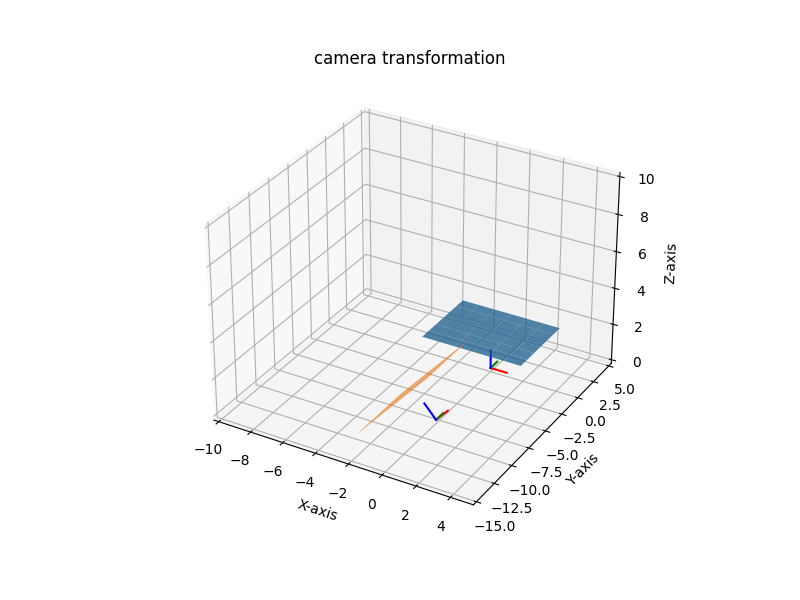

In [50]:
# Cameras shown as coordinate systems and their respective images.

# define axis and figure
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111,projection='3d')

# set limits
ax.set(xlim=(-10, 5), ylim=(-15, 5), zlim=(0, 10))

# plot the global basis and the transformed camera basis
ax = pr.plot_basis(ax)
ax = pr.plot_basis(ax, R, offset)

# plot the original and transformed image plane
ax.plot_surface(xx, yy, Z, alpha=0.75)
ax.plot_surface(xxt, yyt, Zt, alpha=0.75)

ax.set_title("camera transformation")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

### Create change of basis matrix

In [51]:
# E is the R_ and T_ matrix, here we take its inverse

E = np.linalg.inv(T_ @ R_)

In [52]:
# remove last row of E
E = E[:-1, :]

### Perform change of coordinates

In [53]:
# We take a random point with coordinates wrt the world, and describe it in the camera coordinates
cw = np.array([-1/np.sqrt(2), -8, 1/np.sqrt(2), 1]) # homogeneous coordinates of the point wrt the world
cc = E @ cw.reshape(4, 1) # coordinates of the point wrt the camera
cc = cc.flatten()

In [57]:
cc,cw,E

(array([0., 0., 1.]),
 array([-0.70710678, -8.        ,  0.70710678,  1.        ]),
 array([[ 0.70710678,  0.        ,  0.70710678,  0.        ],
        [ 0.        ,  1.        ,  0.        ,  8.        ],
        [-0.70710678,  0.        ,  0.70710678,  0.        ]]))